# SymPy Introduction
Python has a library called `sympy`, short for symbolic python. See https://docs.sympy.org/latest/modules/vector/fields.html. SymPy is able to do mathemical operations in a symbolic way. This is very much like Mathematica or Maple if you have used those applications. In this exercise, we will look at the gradient, the divergence, and the curl of vector fields. First, let's import some libraries.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import quiver
plt.rcParams["figure.figsize"] = (10,10)#Make big graphs
plt.rcParams.update({'font.size': 16})#Make big fonts on graphs
from sympy.vector import *

## Coordinate system
We will create a coordinate system $R$. This is just a coordinate space, e.g., $x, y, z$. Then, we will define a simple vector.

$$\vec{u}=-3\hat{x}+\hat{y}+\hat{z}\\
\vec{v}=3\hat{x}+4\hat{y}+5\hat{z}\\
\vec{w}=-6\hat{x}-8\hat{y}-10\hat{z}$$

You will notice here we use $\hat{i}, \hat{j}, \hat{k}$ as `.i, .j, .k`. $\hat{x}, \hat{y}, \hat{z}$ is `.x, .y, .z` notation does <strong>not</strong> work in the `sympy.vector` package. It does work in the `sympy.physics.vector` package, but this later package lacks simple div, grad, curl features that do exist in the former package.

The first vector is done for you.

In [11]:
R = CoordSys3D('R')
u = -3*R.i + 1*R.j + 1*R.k
v = 3*R.i + 4*R.j + 5*R.k
w = -6*R.i - 8*R.j - 10*R.k
print(u)
print(v)
print(w)

(-3)*R.i + R.j + R.k
3*R.i + 4*R.j + 5*R.k
(-6)*R.i + (-8)*R.j + (-10)*R.k


### The Dot Product
Let's take the dot products

$$ \vec{u}\cdot\vec{v}\\
\vec{v}\cdot\vec{w}$$

<font color=red>Before doing this computationally, you should do them by hand so you know the results.</font> The dot product in this physics vector package is

```python
vec1.dot(vec2)
```

For example, I could dot the unit vectors $\hat{x}$ and $\hat{y}$

```python
R.i.dot(R.j)
```

I can dot vectors we create using the notation

```python
u.dot(w)
```

In [12]:
udotv = u.dot(v) #store the result of the dot product u dot v
vdotw = v.dot(w) #store the result of the dot product v dot w
print(udotv)
print(vdotw)

0
-100


## The Cross Product
The vector cross product is very similar to the dot product in how is called. However, we know the result is a vector and not a scalar. Therefore, we expect a very different kind of output. To call the cross product, you may use one of the following methods.
```python
vec1.cross(vec2)
```

Here is an example of the cross products of $\hat{x}\times\hat{x}$ and $\hat{x}\times\hat{z}$. <font color=red>What do you expect the results to be?</font>

In [13]:
xcrossx = R.i.cross(R.i)
xcrossz = R.i.cross(R.k)
print(xcrossx)
print(xcrossz)

0
(-1)*R.j


Now, you can calculate

$$\vec{u} \times \vec{v}\\
\vec{u} \times \vec{w}\\
\vec{v} \times \vec{w}$$

<font color=red>Be sure to do these calculations by hand so you can verify the results.</font>

In [14]:
print('u x v = ', u.cross(v))
print('u x w = ', u.cross(w))
print('v x w = ', v.cross(w))

u x v =  R.i + 18*R.j + (-15)*R.k
u x w =  (-2)*R.i + (-36)*R.j + 30*R.k
v x w =  0


Keep in mind that the $\vec{v}\times\vec{w}$ result appears to be scalar, but it is still a vector.

## The Gradient
A mathematical operation we will use frequently is the gradient.

$$\vec{\nabla f} = \frac{\partial f}{\partial x}\hat{x} + \frac{\partial f}{\partial y}\hat{y} + \frac{\partial f}{\partial z}\hat{z}$$
This function returns a vector pointing in the direction of maximum slope. The magnitude of this vector is the magnitude of the slope.

The gradient operation is on a scalar function. Therefore, we need to create a scalar function that depends on spatial coordinates. For example, we could define a function that describes the altitude of a hill ($z$) as a function of position ($x$ is eastward position and $y$ is northward position from an origin.). See Griffiths E&M textbook problem 1.12.

<font color=red> In the code cell below, define the function.</font>

$$z(x,y) = x^2 + 2xy -y^2$$

<font color=red> Refer to the previous scalar and vector field plotting activity to plot this scalar field.</font>

The function can live in our $R$ coordinate system. However, it is scalar. To create it symbolically, we use `R.x` and `R.y` to indicate variables $x$ and $y$. SymPy will interpret these as coordinate variables as in the gradient formula above.

<font color=red>After defining the function, calculate the gradient using the notation

```python
gradient(z)
```

<font color=red>Be sure to assign the result to a variable, e.g., `gradz`. Refer to our previous scalar and vector field plotting to plot the resulting vector field.</font>

In [15]:
z = R.x*R.x + 2*R.x*R.y - R.y*R.y
gradz = gradient(z)
print(gradz)

(2*R.x + 2*R.y)*R.i + (2*R.x - 2*R.y)*R.j


<Figure size 720x720 with 0 Axes>

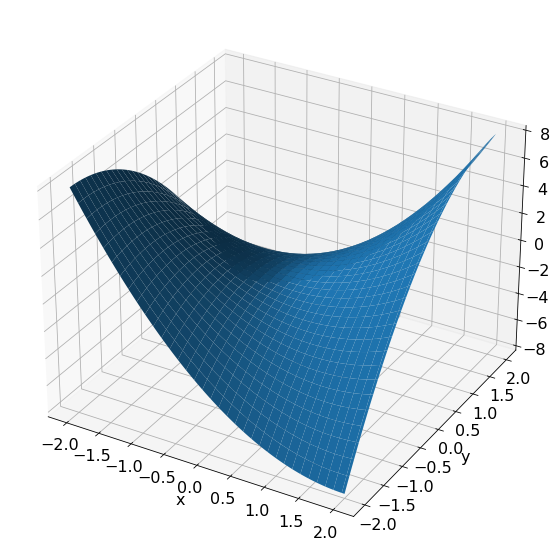

In [25]:
x,y = np.meshgrid(np.linspace(-2, 2, 101,), np.linspace(-2,2,101))
zxy = x**2 + 2*x*y - y**2
# Surface plot
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(x,y,zxy)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

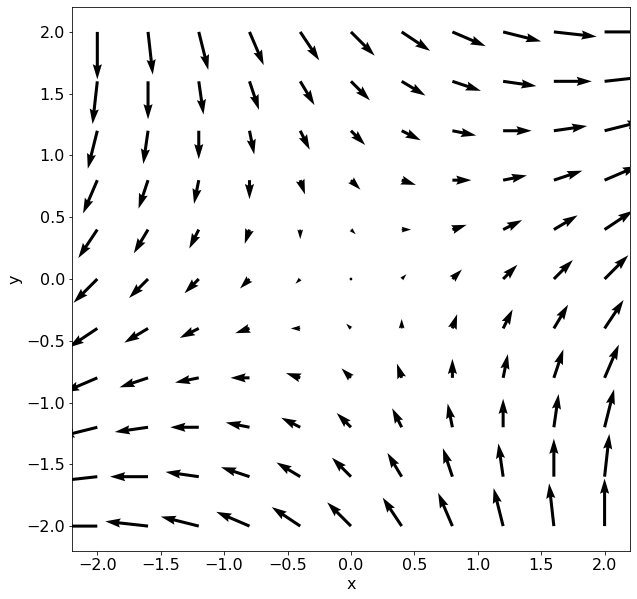

In [26]:
x,y = np.meshgrid(np.linspace(-2, 2, 11,), np.linspace(-2,2,11))
gradx = 2*x+2*y
grady = 2*x-2*y
plt.quiver(x, y, gradx, grady)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## The Divergence
The divergence is a vector operation that calculates the dot product of the $\nabla$ operator and a vector. 

$$\vec{\nabla}\cdot \vec{v} = \left(\frac{\partial}{\partial x}\hat{x} + \frac{\partial}{\partial y}\hat{y}\right) \cdot \left(v_x\hat{x} +v_y\hat{y}\right)$$

The divergence value is an indication of how rapidly a function diverges.

Let's consider a vector field in 2 dimensions.

$$\vec{F} = x\hat{x} + y\hat{y}$$

The values (magnitudes) of this vector field get larger as $x$ and $y$ increase. So, we expect it have a divergence. <font color=red>Create this vector field. Then, calculate its divergence using the notation below. As always, calculate by hand what you expect as a result. Plot the vector field and convince yourself that the divergence makes sense.</font>

```python
divF = divergence(F)
```


In [22]:
F = R.x*R.i + R.y*R.j

divF = divergence(F)
print(divF)

2


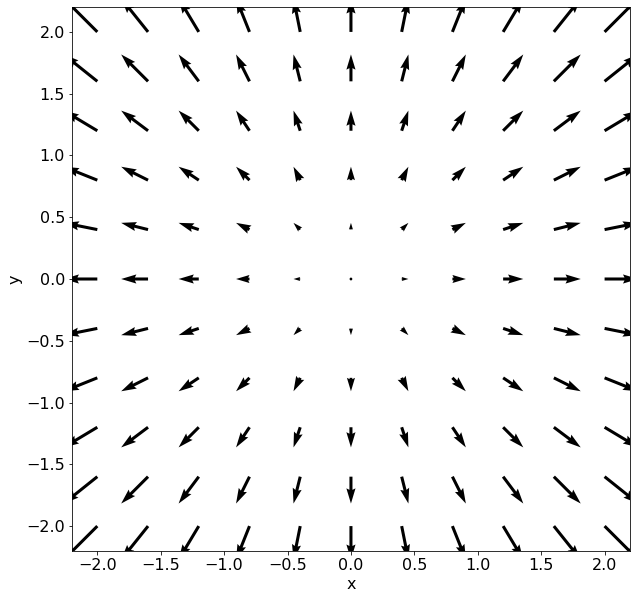

In [27]:
fx = x
fy = y

plt.quiver(x, y, fx, fy)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### A Challenge
<font color=red>Can you think of a 2D vector field that would have zero divergence? Create the field and verify it has zero divergence.</font>

## The Curl
The curl of a vector field tells us about rotational changes within the field. The rotational part comes from the cross product, and the changing part comes from the "Del" ($\vec{\nabla}$). Mathematically, the curl of a vector is

$$\vec{\nabla}\times\vec{v} = \begin{vmatrix}
\hat{x} & \hat{y} & \hat{z}\\
\frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z}\\
v_x & v_y & v_z
\end{vmatrix}$$

Examples of vector fields with a curl are given in Example 1.5 of Griffiths E&M textbook.

$$\vec{v_a} = -y\hat{x} + x\hat{y} +0\hat{z}\\
\vec{v_b} = 0\hat{x} + x\hat{y} +0\hat{z}$$

<font color=red>Create these vector fields and compute their curls using the notation below.Plot the vector fields and their resulting curls (4 graphs)</font>

```python
curlF = curl(F)
```


0


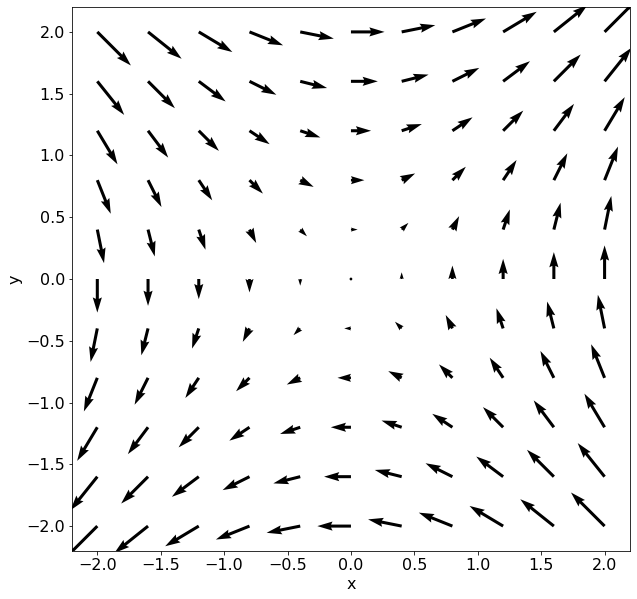

In [28]:
#This 2D vector field has zero divergence
divfree = R.y*R.i + R.x*R.j
divdivfree = divergence(divfree)
print(divdivfree)

divfreex = y
divfreey = x

plt.quiver(x, y, divfreex, divfreey)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [67]:
va = -R.y*R.i + R.x*R.j +0*R.k
vb = 0*R.i + R.x*R.j + 0*R.k

curlva = curl(va)
curlvb = curl(vb)
print(curlva)
print(curlvb)

2*R.k
R.k


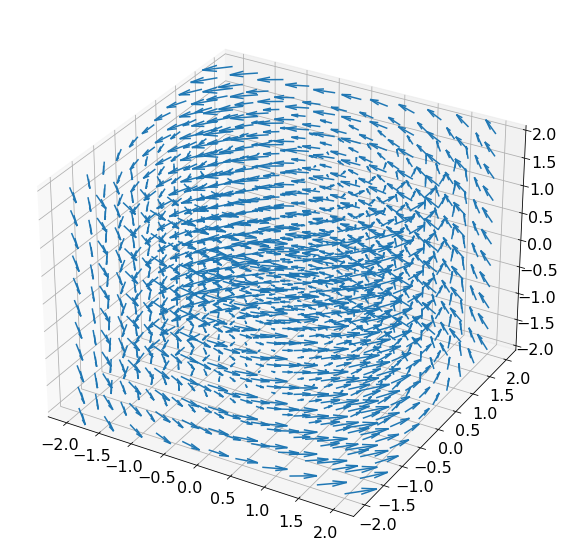

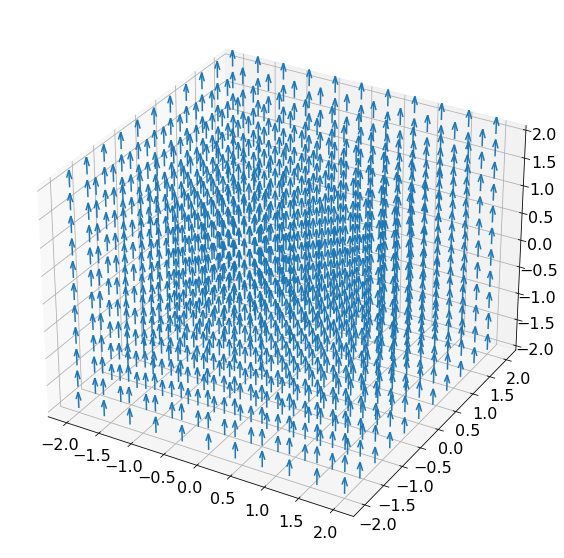

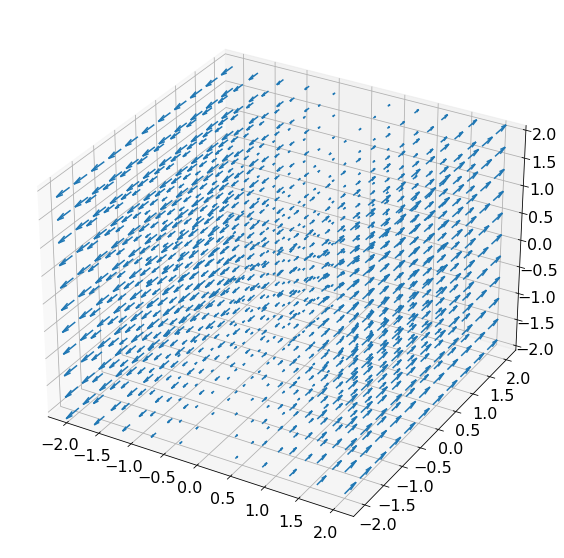

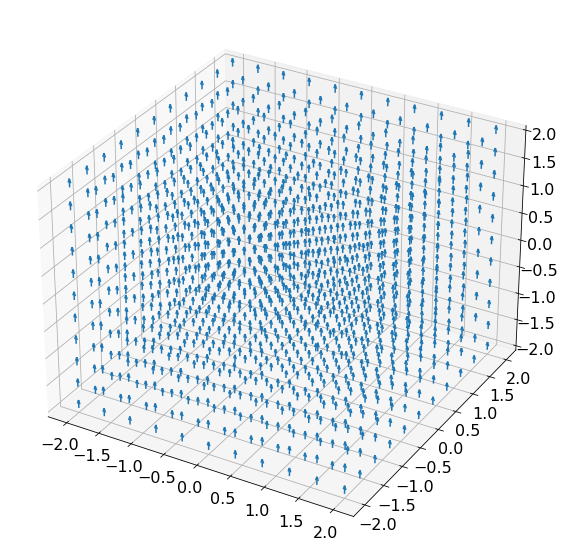

In [44]:
x,y,z = np.meshgrid(np.linspace(-2,2,11), np.linspace(-2,2,11),np.linspace(-2,2,11))
vax = -y
vay = x
vaz = 0 * z
cvax = 0*x
cvay = 0*y
cvaz = 2*np.ones(len(z))

vbx = 0*x
vby = x
vbz = 0*z
cvbx = 0*x
cvby = 0*y
cvbz = np.ones(len(z))

# Plot arrows
ax = plt.figure().add_subplot(projection='3d')
ax.quiver(x, y, z, vax, vay, vaz, length=0.15, arrow_length_ratio = 0.5) 
plt.show()

# Plot arrows
ax = plt.figure().add_subplot(projection='3d')
ax.quiver(x, y, z, cvax, cvay, cvaz, length=0.15, arrow_length_ratio = 0.5) 
plt.show()

# Plot arrows
ax = plt.figure().add_subplot(projection='3d')
ax.quiver(x, y, z, vbx, vby, vbz, length=0.15, arrow_length_ratio = 0.5) 
plt.show()

# Plot arrows
ax = plt.figure().add_subplot(projection='3d')
ax.quiver(x, y, z, cvbx, cvby, cvbz, length=0.15, arrow_length_ratio = 0.5) 
plt.show()

What if we make a small change to $\vec{v_b}$? Suppose, we make it

$$\vec{v_{b2}} = 0\hat{x} + y\hat{y} +0\hat{z}$$

<font color=red>What does this vector field look like? HINT: See Figure 1.18 in Griffiths E&M textbook. You can plot it too!

Create this vector, calculate its curl.</font>

In [68]:
vb2 = 0*R.i + R.y*R.j + 0*R.k

curlvb2 = curl(vb2)
print(curlvb2)

0
